## Hypothesis Testing
• A hypothesis is a premise or claim (assertion) about a population parameter.
    Example: The mean monthly cell phone bill in this city is μ=$42.
    Example: The proportion of adults in this city with cell phones is π= 0.88

• The general idea of hypothesis testing involves:
    1. Making an initial assumption.
    2. Collecting evidence (data).
    3. Based on the available evidence (data), deciding whether to reject or not reject the initial assumption.

#### • Null hypothesis - H0 is the currently accepted value for a parameter

• It is similar to the notion of innocent until proven guilty.

• Always contains “=“, or “≤”, or “≥” sign.

• May or may not be rejected.


#### • The Alternative Hypothesis - HA - is generally the hypothesis that researcher is trying to prove.

• Challenges the status quo.

• Never contains the “=“, or “≤”, or “≥” sign.

• May or may not be proven.

##### Example
One place where you can consistently see the general idea of hypothesis testing in action is in criminal trials held in the United States. Our criminal justice system assumes "the defendant is innocent until proven guilty." That is, our initial assumption is that the defendant is innocent.

In the practice of statistics, we make our initial assumption when we state our two competing hypotheses -- the null hypothesis (H0) and the alternative hypothesis (HA). Here, our hypotheses are:

H0: Defendant is not guilty (innocent)
HA: Defendant is guilty

In statistics, we always assume the null hypothesis is true. That is, the null hypothesis is always our initial assumption.

The prosecution team then collects evidence — such as finger prints, blood spots, hair samples, carpet fibers, shoe prints, ransom notes, and handwriting samples — with the hopes of finding "sufficient evidence" to make the assumption of innocence refutable.

In statistics, the data are the evidence.

The jury then makes a decision based on the available evidence:

       • If the jury finds sufficient evidence — beyond a reasonable doubt — to make the assumption of innocence refutable, the jury rejects the null hypothesis and deems the defendant guilty. We behave as if the defendant is guilty.
   
       • If there is insufficient evidence, then the jury does not reject the null hypothesis. We behave as if the defendant is innocent.
    
In statistics, we always make one of two decisions. We either "reject the null hypothesis" or we "fail to reject the null hypothesis."

In statistics, there are two ways to determine whether the evidence is likely or unlikely given the initial assumption:

    • We could take the "critical value approach" (t-test)
    • Or, we could take the "P-value approach" (p-value)   

##### Critical value approach

The critical value approach involves determining "likely" or "unlikely" by determining whether or not the observed test statistic is more extreme than would be expected if the null hypothesis were true. That is, it entails comparing the observed test statistic to some cutoff value, called the "critical value." If the test statistic is more extreme than the critical value, then the null hypothesis is rejected in favor of the alternative hypothesis. If the test statistic is not as extreme as the critical value, then the null hypothesis is not rejected.

Specifically, the four steps involved in using the critical value approach to conducting any hypothesis test are:

1.Specify the null and alternative hypotheses.

2.Using the sample data and assuming the null hypothesis is true, calculate the value of the test statistic. To conduct the hypothesis test for the population mean μ, we use the t-statistic t =(x−μ)/(s/√n) which follows a t-distribution with n - 1 degrees of freedom.

3.Determine the critical value by finding the value of the known distribution of the test statistic such that the "significance level of the test" — is small (typically 0.01, 0.05, or 0.10).

4.Compare the test statistic to the critical value. If the test statistic is more extreme in the direction of the alternative than the critical value, reject the null hypothesis in favor of the alternative hypothesis. If the test statistic is less extreme than the critical value, do not reject the null hypothesis.
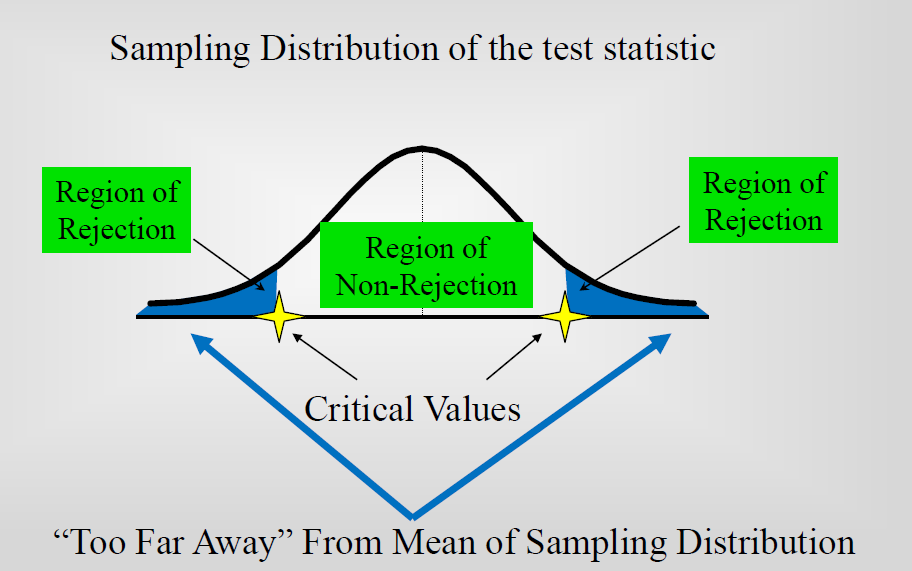


##### Example:
Suppose we are given a data set that lists 272 eruption times and wait times between eruptions for the Old Faithful geyser in Yellowstone National Park, Wyoming, USA.

1.Specify the null and alternative hypotheses: 
Our null hypothysis is that the average waiting between eruption is greater than or equal to 71 mins.
And our alternate hypothesis is that the average waiting between eruption is less than 71 mins.
Therefore,
    H0: μ >= 71 and 
    HA: μ <71 
    

In [43]:
import pandas
from scipy import stats
import matplotlib.pyplot as plt
import math

data = pandas.read_csv("C:/Users/Pradnya/Documents/PC/TTU/DataIncub/HypothesisTesting/faithful.csv")
data.shape
data.columns
pandas.DataFrame.describe(data)

,Unnamed: 0,eruptions,waiting
count,272.000000,272.000000,272.000000
mean,136.500000,3.487783,70.897059
std,78.663842,1.141371,13.594974
min,1.000000,1.600000,43.000000
25%,68.750000,2.162750,58.000000
50%,136.500000,4.000000,76.000000
75%,204.250000,4.454250,82.000000
max,272.000000,5.100000,96.000000


2.Since n=272, out t test has n-1 = 271 degrees of freedom. Also, suppose we set our significance level α at 0.05, so that we have only a 5% chance of making a Type I error.

The critical value for conducting the above left-tailed test is the t-value, denoted tα, n - 1 , such that the probability to the left of it is α. The critical value t0.05,271 is -1.65049. That is, we would reject the null hypothesis H0 :  μ >= 71  in favor of the alternative hypothesis HA : μ < 71 if the test statistic t* is greater than -1.65049:

In [36]:
t_critical =stats.t.ppf(0.05, 271)
t_critical

-1.6504957788175261

3.Compute the test statistic of the known distribution of the test statistic for the chosen level of significance. Here tstat is -0.12488.

In [59]:
t_stat,p_val = stats.ttest_1samp(data['waiting'], 71)
t_stat

-0.1248806655665132

4.Finally make the decision by comparing the critical value with the tstat. Here the test statistic is less extreme than the critical value, do not reject the null hypothesis.
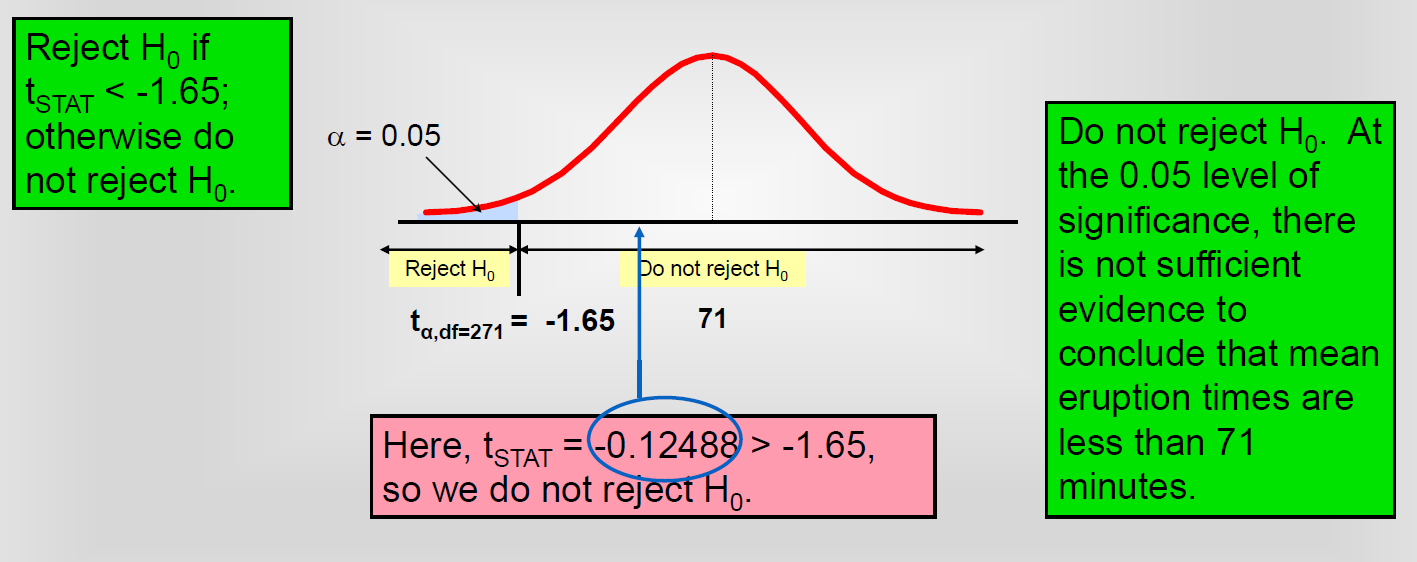

In [40]:
t_stat > t_critical

True

##### P-value approach

The P-value approach involves determining "likely" or "unlikely" by determining the probability — assuming the null hypothesis were true — of observing a more extreme test statistic in the direction of the alternative hypothesis than the one observed. If the P-value is small, say less than (or equal to) α, then it is "unlikely." And, if the P-value is large, say more than α, then it is "likely."

Here also, four steps are invloved as follows:

1.Specify the null and alternative hypotheses.

2.Using the sample data and assuming the null hypothesis is true, calculate the value of the test statistic. Again, to conduct the hypothesis test for the population mean μ, we use the t-statistic t∗=(x−μ)/(s/√n) which follows a t-distribution with n - 1 degrees of freedom.

3.Using the known distribution of the test statistic, calculate the P-value: "If the null hypothesis is true, what is the probability that we'd observe a more extreme test statistic in the direction of the alternative hypothesis than we did?" (Note how this question is equivalent to the question answered in criminal trials: "If the defendant is innocent, what is the chance that we'd observe such extreme criminal evidence?")

4.Set the significance level, α, the probability of making a Type I error to be small — 0.01, 0.05, or 0.10. Compare the P-value to α. If the P-value is less than (or equal to) α, reject the null hypothesis in favor of the alternative hypothesis. If the P-value is greater than α, do not reject the null hypothesis.

In [56]:
pvalue = stats.t.cdf(x= t_stat, df= 271)
pvalue 

0.45035530467169915

In [58]:
pvalue<0.05

False

Here, the P-value is greater than α, so we do not reject the null hypothesis. That is, at 0.05 level of significance there is not sufficient evidende to colclude that the average waiting between eruption is less than 71 mins 

Similarly, we can perform right-tailed test H0 : μ <=71 and HA : μ > 71. For a two-tailed test we assume, H0 : μ = 71 and HA : μ ≠ 71 and the probability that we would observe a test statistic less than -2.5 or greater than 2.5 if the population mean μ really were 71.

Hypothesis testing can be used to test hypothesis for the difference between two population means,  μ1–μ2.
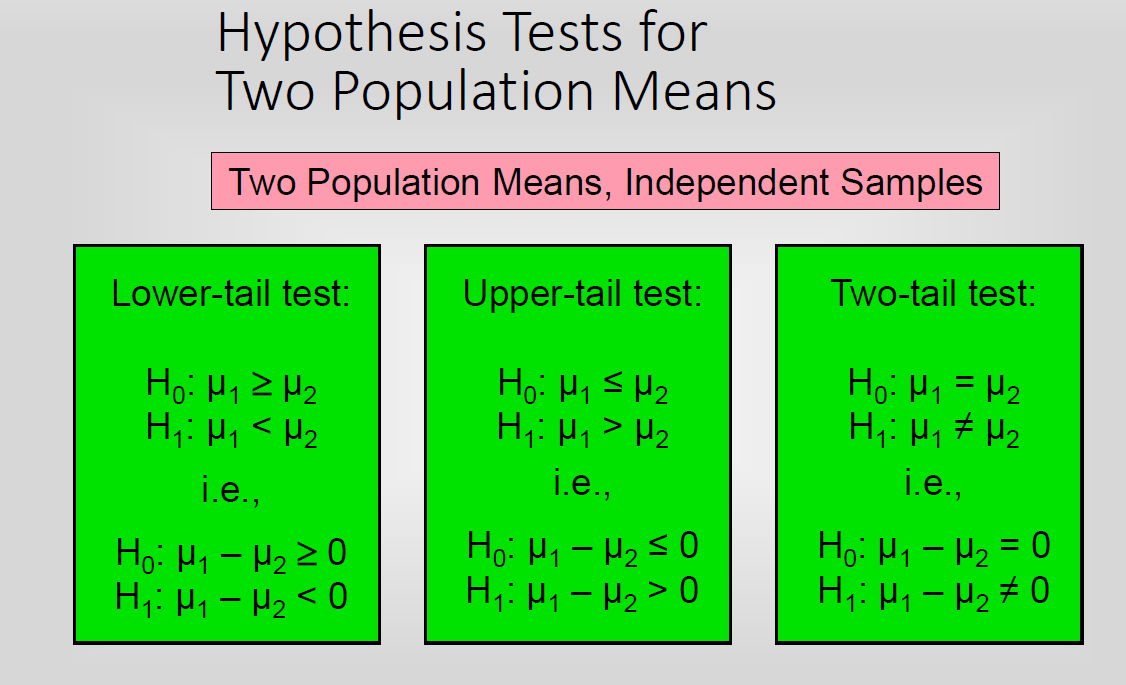
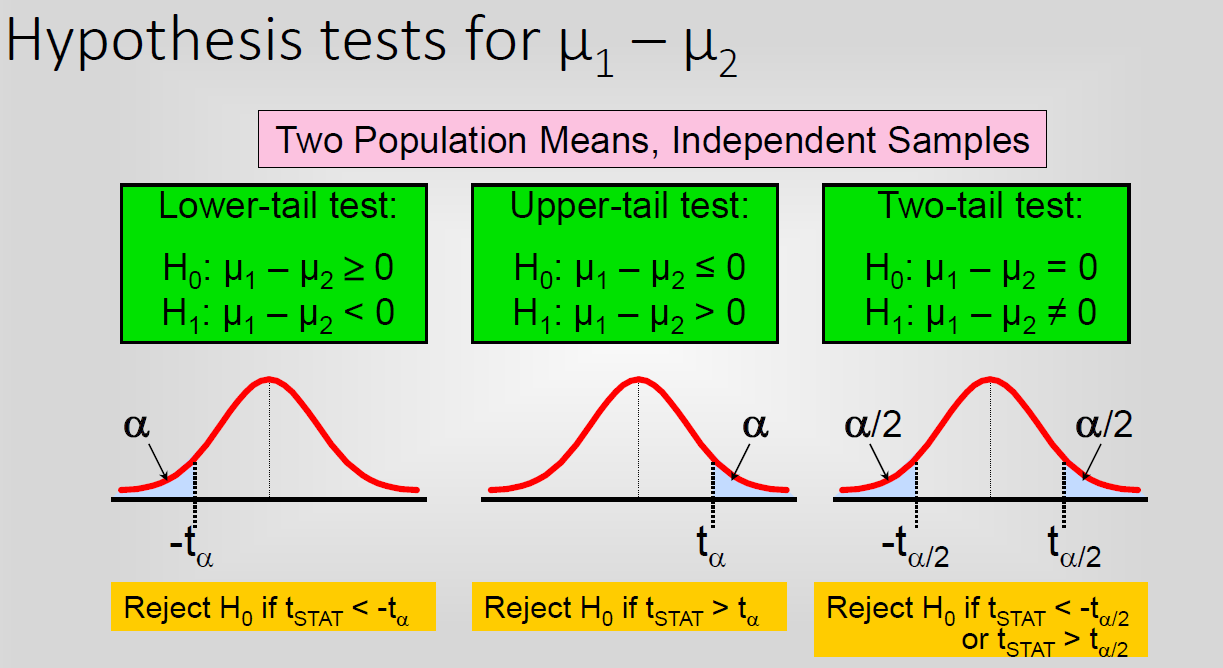

##### Assumptions:
Samples are randomly and independently drawn.

Populations are normally distributed or both sample sizes are at least 30.

Population variances are unknown but assumed equal/unequal.


##### Making Possible Errors in Hypothesis Test Decision Making
• Type I Error:
    • Reject a true null hypothesis.
    • A Type I error is a “false alarm.”
    • The probability of a Type I Error is α.
    • Called level of significance of the test.
    • Set by researcher in advance.
    • Absense of type I error corresponds to maximum precision.
    
• Type II Error:
    • Failure to reject a false null hypothesis.
    • Type II error represents a “missed opportunity.”
    • The probability of a Type II Error is β.
    • Absense of type II error corresponds to maximum recall.
    
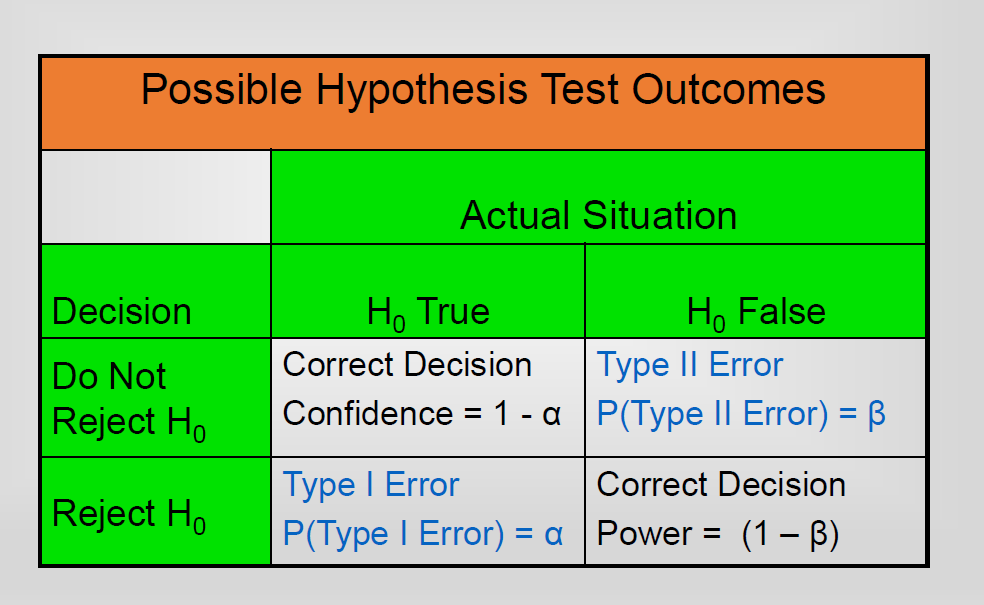